<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_2/mini_project_2_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

# PART 1

In [ ]:
# part 1
#https://drive.google.com/file/d/1LjgD0GCoCoi_nIXp4AkRsyvd8CNd1hY1/view?usp=sharing
!gdown 1LjgD0GCoCoi_nIXp4AkRsyvd8CNd1hY1

Downloading...
From: https://drive.google.com/uc?id=1LjgD0GCoCoi_nIXp4AkRsyvd8CNd1hY1
To: /content/data.csv
100% 527k/527k [00:00<00:00, 71.1MB/s]


In [ ]:
data = pd.read_csv('/content/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
nan = data.isnull().sum()
nan

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
#data.fillna(data.mean(),inplace = True )

In [ ]:
#data.dropna(inplace = True)

# PART 2

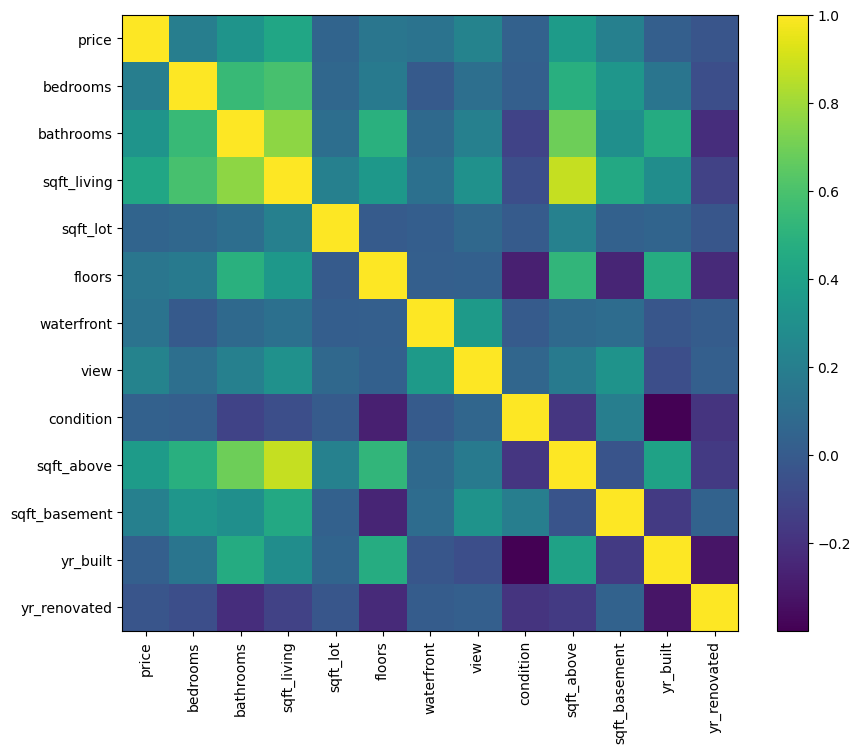

In [ ]:
# part 2
corr_mat = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_mat, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_mat)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat)), corr_mat.columns)
plt.show()

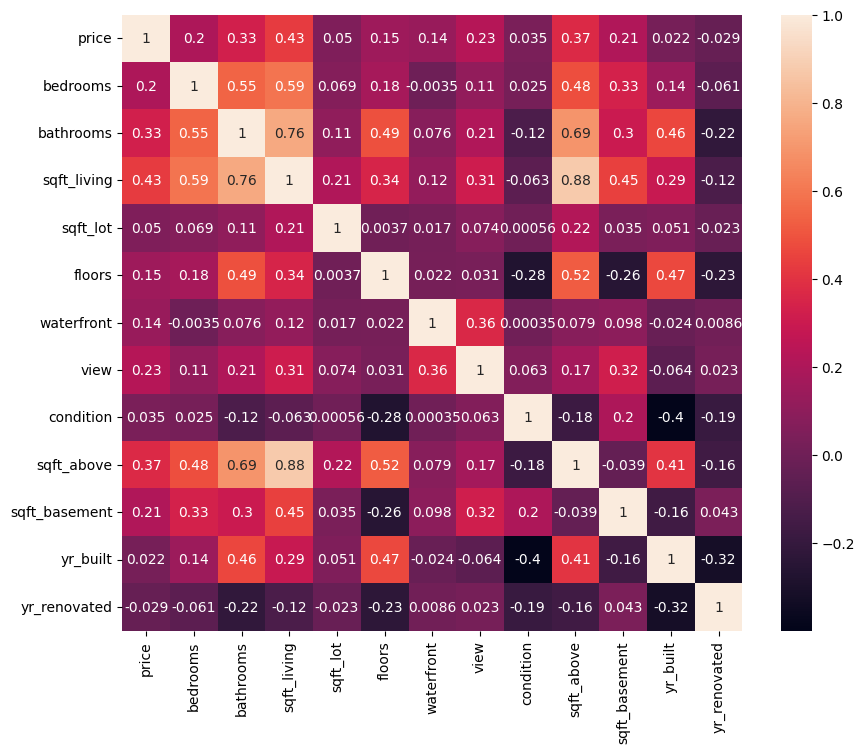

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [ ]:
num = data.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
max_corr_feature_with_price = corr_mat['price'].nlargest(2).iloc[1:2].index[0]
max_corr_value_with_price = corr_mat['price'].nlargest(2).iloc[1:2].values[0]
print(f"max_corr_feature_with_price: {max_corr_feature_with_price} max_corr_value_with_price: {max_corr_value_with_price}")

max_corr_feature_with_price: sqft_living max_corr_value_with_price: 0.4304100254326265


# PART 3

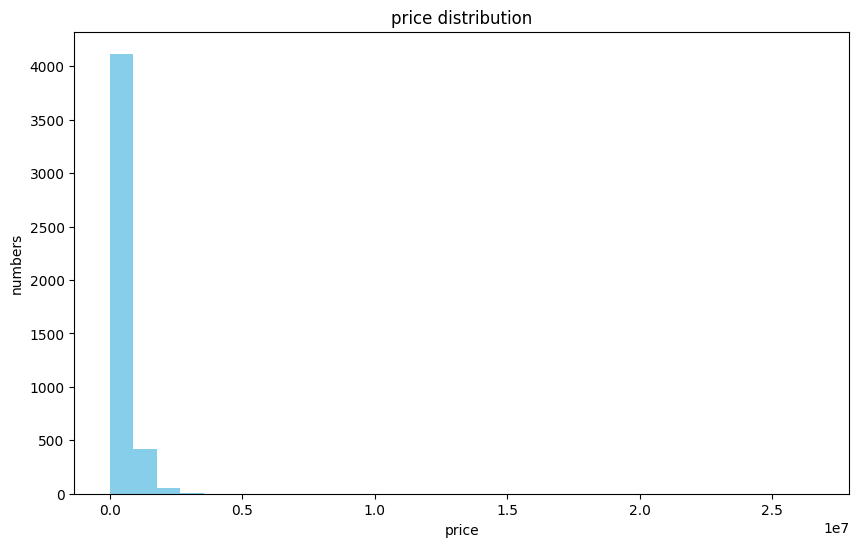

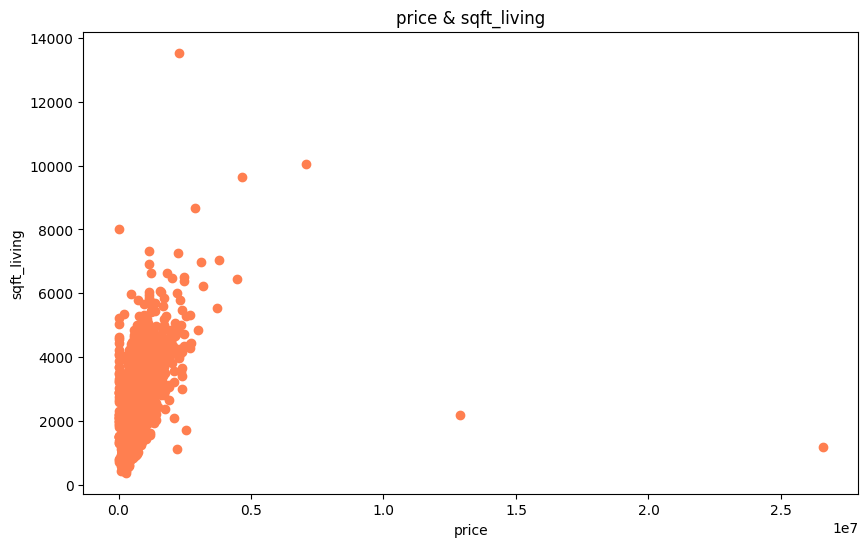

In [ ]:
# part 3
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, color='skyblue')
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('numbers')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data[max_corr_feature_with_price], color='coral')
plt.title(f'price & {max_corr_feature_with_price}')
plt.xlabel('price')
plt.ylabel(max_corr_feature_with_price)
plt.show()

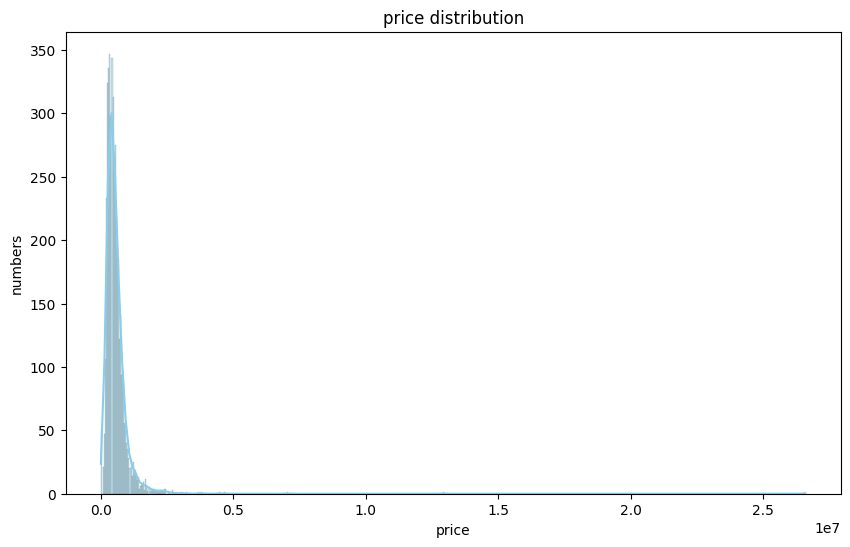

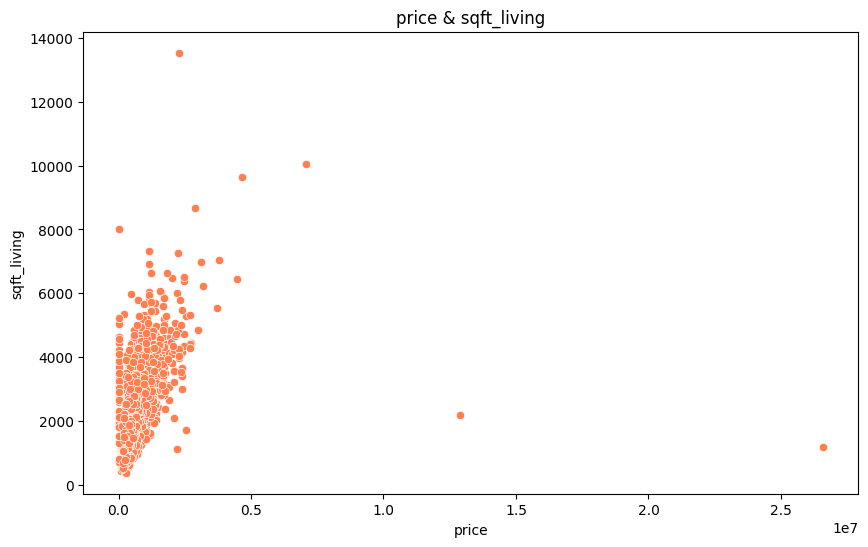

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='skyblue')
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('numbers')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y=max_corr_feature_with_price, data=data, color='coral')
plt.title(f'price & {max_corr_feature_with_price}')
plt.xlabel('price')
plt.ylabel(max_corr_feature_with_price)
plt.show()

# PART 4

In [ ]:
# part 4
data['date'] = pd.to_datetime(data['date'])
data['mounth'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [ ]:
data = data.drop('date', axis=1)

In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,mounth,year
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5,2014
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5,2014
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5,2014
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5,2014
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,7,2014
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,7,2014
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,7,2014
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,7,2014


# PART 5

In [ ]:
# part 5
dummy = ['country', 'statezip', 'city', 'street']
data2 = pd.get_dummies(data, columns=dummy, drop_first=True)
data2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street_Indian Trail,street_Nuthatch Trail,street_SE 170th Pl,street_SE 21st Ct,street_Schmitz Park to Alki Trail,street_Shangri-La Way NW,street_Sunrise Loop Trail,street_Tolt Pipeline Trail,street_Trossachs Blvd SE,street_Valley View Trail
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
l1 = LabelEncoder()

for i in data2.columns:
    if data2[i].dtype == 'object':
        data2[i] = l1.fit_transform(data2[i])

data2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street_Indian Trail,street_Nuthatch Trail,street_SE 170th Pl,street_SE 21st Ct,street_Schmitz Park to Alki Trail,street_Shangri-La Way NW,street_Sunrise Loop Trail,street_Tolt Pipeline Trail,street_Trossachs Blvd SE,street_Valley View Trail
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data2.drop(["price"], axis=1)
y = data2["price"]
X,y

(      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0          3.0       1.50         1340      7912     1.5           0     0   
 1          5.0       2.50         3650      9050     2.0           0     4   
 2          3.0       2.00         1930     11947     1.0           0     0   
 3          3.0       2.25         2000      8030     1.0           0     0   
 4          4.0       2.50         1940     10500     1.0           0     0   
 ...        ...        ...          ...       ...     ...         ...   ...   
 4595       3.0       1.75         1510      6360     1.0           0     0   
 4596       3.0       2.50         1460      7573     2.0           0     0   
 4597       3.0       2.50         3010      7014     2.0           0     0   
 4598       4.0       2.00         2090      6630     1.0           0     0   
 4599       3.0       2.50         1490      8102     2.0           0     0   
 
       condition  sqft_above  sqft_basement  ...  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3680, 4657), (920, 4657), (3680,), (920,))

In [ ]:
max_1 = y_train.values
maximum = 0
minimum = min(y_train)

for i in range(X_train.shape[0]):
    if max_1[i] > maximum:
        maximum = max_1[i]

In [ ]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_train.head(10)
print(X_train.max())

bedrooms                      1.0
bathrooms                     1.0
sqft_living                   1.0
sqft_lot                      1.0
floors                        1.0
                             ... 
street_Shangri-La Way NW      1.0
street_Sunrise Loop Trail     0.0
street_Tolt Pipeline Trail    0.0
street_Trossachs Blvd SE      1.0
street_Valley View Trail      1.0
Length: 4657, dtype: float64


In [ ]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

# PART 6

In [ ]:
# part 6
model = Sequential()
model.add(Dense(40, activation= 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(20, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                186320    
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 187361 (731.88 KB)
Trainable params: 187361 (731.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
295/295 [==============================] - 8s 19ms/step - loss: 0.0016 - val_loss: 7.6422e-04
Epoch 2/100
295/295 [==============================] - 2s 6ms/step - loss: 8.2543e-04 - val_loss: 8.1987e-04
Epoch 3/100
295/295 [==============================] - 2s 6ms/step - loss: 5.3042e-04 - val_loss: 6.9997e-04
Epoch 4/100
295/295 [==============================] - 2s 6ms/step - loss: 3.6121e-04 - val_loss: 6.7732e-04
Epoch 5/100
295/295 [==============================] - 2s 6ms/step - loss: 2.5573e-04 - val_loss: 7.1103e-04
Epoch 6/100
295/295 [==============================] - 2s 6ms/step - loss: 1.9632e-04 - val_loss: 7.6771e-04
Epoch 7/100
295/295 [==============================] - 3s 9ms/step - loss: 1.9053e-04 - val_loss: 6.6325e-04
Epoch 8/100
295/295 [==============================] - 2s 8ms/step - loss: 1.6494e-04 - val_loss: 7.2325e-04
Epoch 9/100
295/295 [==============================] - 2s 6ms/step - loss: 1.3595e-04 - val_loss: 7.1955e-04
Epoch 10/100
295/295 [

In [ ]:
loss = model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 4ms/step - loss: 0.0193


In [ ]:
y_pred = model.predict(X_test)
rscore = r2_score(y_test, y_pred)

29/29 [==============================] - 0s 3ms/step


In [ ]:
rscore

0.05666247688190307

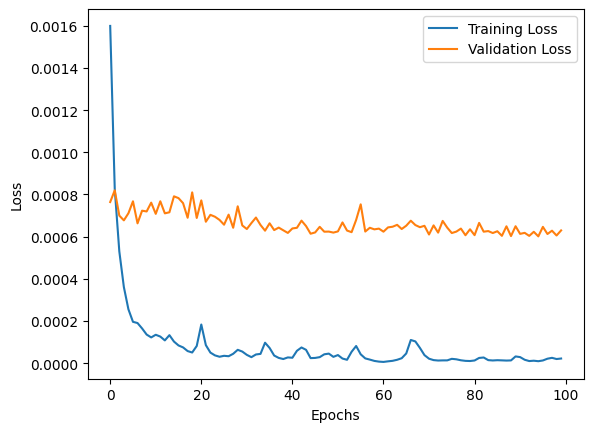

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# PART 7

In [ ]:
# part 7
model_2 = Sequential()
model_2.add(Dense(40, activation= 'relu', input_shape = (X_train.shape[1],)))
model_2.add(Dense(20, activation= 'relu'))
model_2.add(Dense(10, activation= 'relu'))
model_2.add(Dense(1, activation= 'linear'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                186320    
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 187361 (731.88 KB)
Trainable params: 187361 (731.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='sgd', loss='mae')

history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
295/295 [==============================] - 2s 5ms/step - loss: 0.0327 - val_loss: 0.0288
Epoch 2/100
295/295 [==============================] - 1s 4ms/step - loss: 0.0278 - val_loss: 0.0241
Epoch 3/100
295/295 [==============================] - 1s 5ms/step - loss: 0.0241 - val_loss: 0.0244
Epoch 4/100
295/295 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0218
Epoch 5/100
295/295 [==============================] - 1s 4ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 6/100
295/295 [==============================] - 1s 5ms/step - loss: 0.0192 - val_loss: 0.0200
Epoch 7/100
295/295 [==============================] - 2s 8ms/step - loss: 0.0184 - val_loss: 0.0201
Epoch 8/100
295/295 [==============================] - 3s 9ms/step - loss: 0.0179 - val_loss: 0.0168
Epoch 9/100
295/295 [==============================] - 1s 4ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 10/100
295/295 [==============================] - 1s 4ms/step - loss: 0.0171 - val_lo

In [ ]:
loss_2 = model_2.evaluate(X_test, y_test)

29/29 [==============================] - 0s 3ms/step - loss: 0.0253


In [ ]:
y_pred_2 = model_2.predict(X_test)
rscore_2 = r2_score(y_test, y_pred_2)

29/29 [==============================] - 0s 3ms/step


In [ ]:
rscore_2

0.04542789938280567

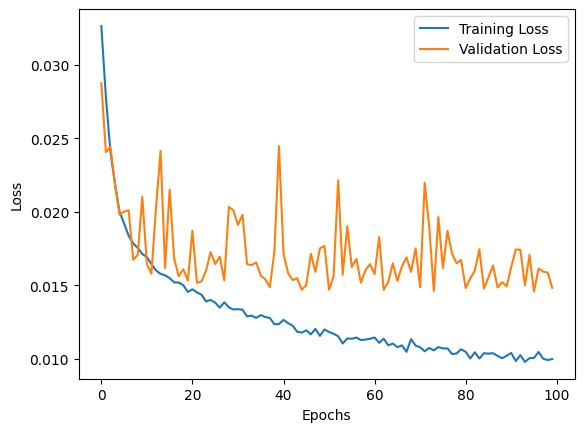

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# PART 8

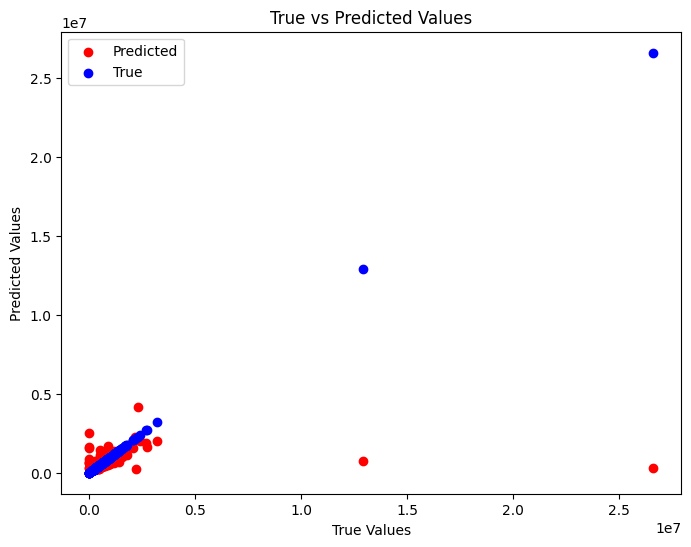

In [ ]:
# part 8
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
indices = np.random.choice(len(y_test_unscaled), 5, replace=False)

y_test_unscaled_5 = y_test_unscaled[indices]
y_test_unscaled_5

array([[215000.],
       [375000.],
       [545000.],
       [293000.],
       [380000.]])

In [ ]:
y_pred_unscaled_5 = y_pred_unscaled[indices]
y_pred_unscaled_5

array([[265446.1 ],
       [348227.8 ],
       [436005.38],
       [557430.8 ],
       [451566.16]], dtype=float32)

In [ ]:
errors = np.abs(y_test_unscaled_5 - y_pred_unscaled_5)
errors

array([[ 50446.09375],
       [ 26772.1875 ],
       [108994.625  ],
       [264430.8125 ],
       [ 71566.15625]])

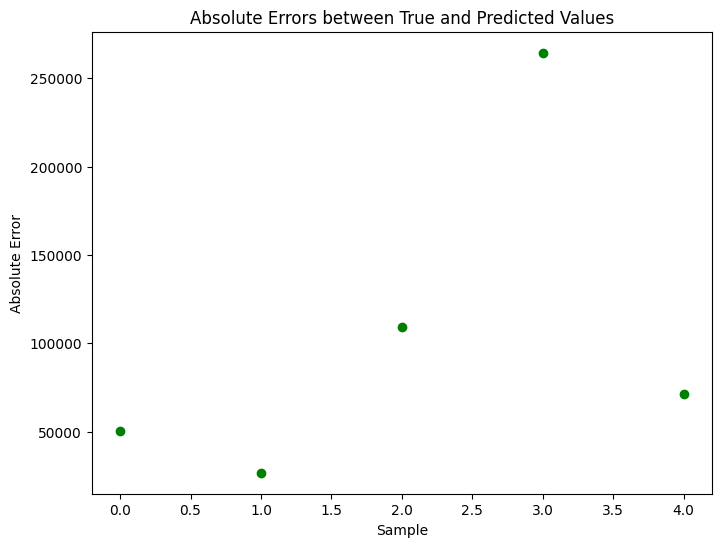

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()

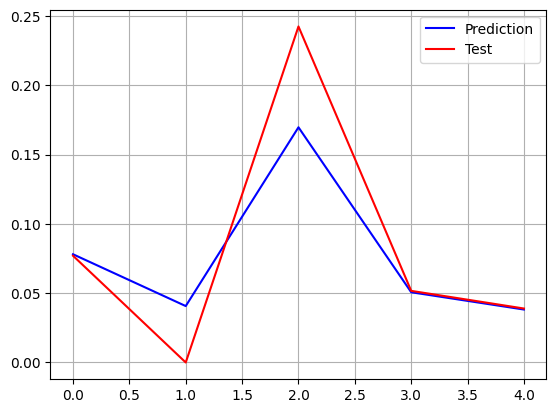

In [ ]:
random_pred = list()
random_test = list()

for i in range(5):
  j = np.random.randint(0, len(y_pred))
  random_pred.append(y_pred[i])
  random_test.append(y_test[i])

plt.plot(random_pred, 'b', label='Prediction')
plt.plot(random_test, 'r', label='Test')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calculate the range of the output values
a = maximum - minimum

# Convert predicted values back to the original scale
y_pred_true = a * (y_pred)
y_pred_true_1 = y_pred_true + minimum

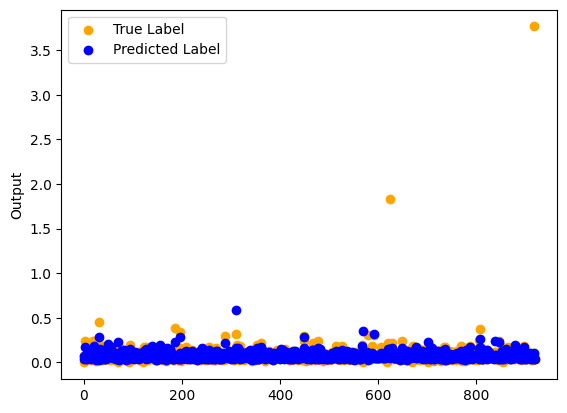

In [ ]:
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(y_test)), y_test, color="orange")  # True labels in orange
plt.scatter(range(len(y_test)), y_pred, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()

In [ ]:
y_test_unscaled[0]

array([544000.])

In [ ]:
y_pred_unscaled[0]

array([551564.94], dtype=float32)

In [ ]:
errors = np.abs(y_test_unscaled - y_pred_unscaled)
errors[0]

array([7564.9375])

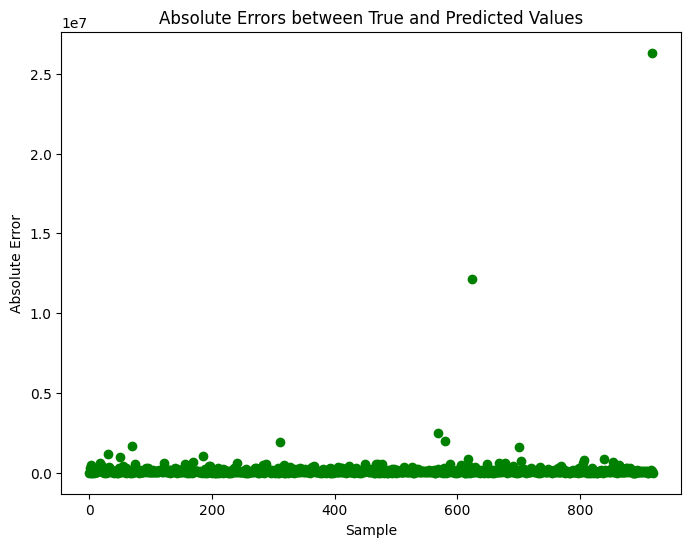

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()